(analysis-label)=
# Light data analysis 

To understand the nature of the data  better, we first do some light data analysis.

In [97]:
data_dir = 'Physics_2020_Dimensions'
df = pd.read_pickle(os.path.join(data_dir, 'dimensions_data_clean.pkl')) 

print('Altogether we are dealing with a total of {} publication items in the category Physical Sciences published in the year 2020'
      .format(len(df)))


all_labels_full = [item for sublist in df.Labels_str.values.tolist() for item in sublist] 
all_labels = list(set(all_labels_full))

multilabel_combs = (set([' '.join(sublist) for sublist in df.Labels_str.values.tolist()]))

print('\nThese are the {} subfields we are dealing with:\n'.format(len(all_labels)))
print(', '.join(all_labels))
print('\nIn the dataset these 10 labels are distributed over {} different multilabel combinations.'.format(len(multilabel_combs)))

Altogether we are dealing with a total of 140717 publication items in the category Physical Sciences published in the year 2020

These are the 10 subfields we are dealing with:

Nuclear and Plasma Physics, Synchrotrons and Accelerators, Astronomical Sciences, Medical and Biological Physics, Quantum Physics, Space Sciences, Classical Physics, Particle and High Energy Physics, Atomic Molecular and Optical Physics, Condensed Matter Physics

In the dataset these 10 labels are distributed over 96 different multilabel combinations:


Visualize the distribution of the publication items over the different subfields. The distribution is quite heterogenous with the highest number of publication items labeled *Condensed Matter Physics* and the lowest number of items labeled *Medical and Biological Physics*. 

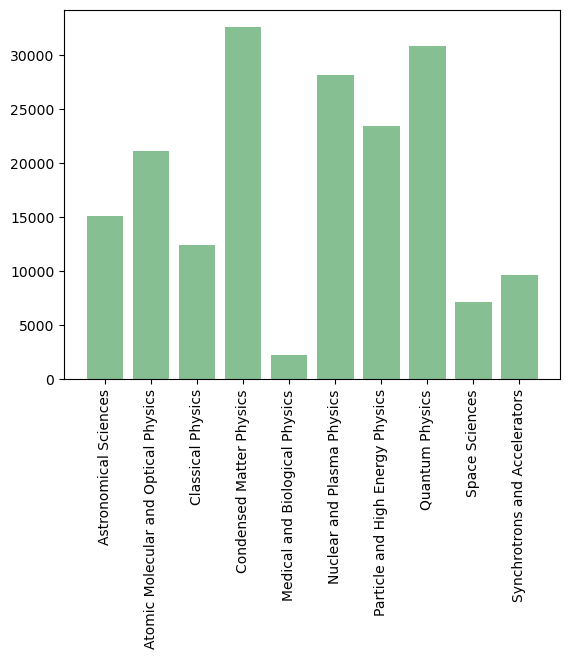

In [89]:
labels, counts = np.unique(all_labels_full, return_counts=True)

fig, ax = plt.subplots()

ax.bar(labels, counts, align='center',color='#86bf91')
ax.set_xticks(ax.get_xticks())  # just get and reset whatever you already have to avoid a bug in matplotlib
ax.set_xticklabels(labels, rotation=90)

plt.show()

Remember that we are dealing with a **multilabel classification**. To get a feel for the distribution of the number of different labels per item in the dataset we plot the distribution.

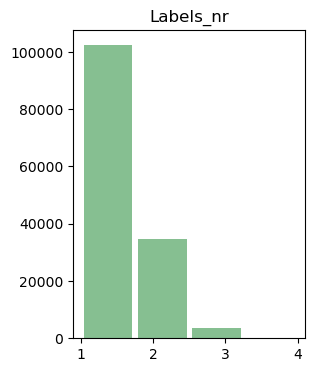

In [90]:
labels_nr = df.Labels_num.apply(lambda x: len(x))
df = df.assign(Labels_nr=labels_nr.values)

df.hist(column='Labels_nr', bins=4, grid=False, color='#86bf91', rwidth=0.9, figsize=(3,4))
plt.show()

In the majority of cases the publications are assigned to only one subfield, about a quarter of the items has two labels, less then 5 percent have three labels, the number of items with four labels is insignificant, no publication item is assigned to more than 4 subfields.  

Quickly inspect the co-occurence graph of the labels:

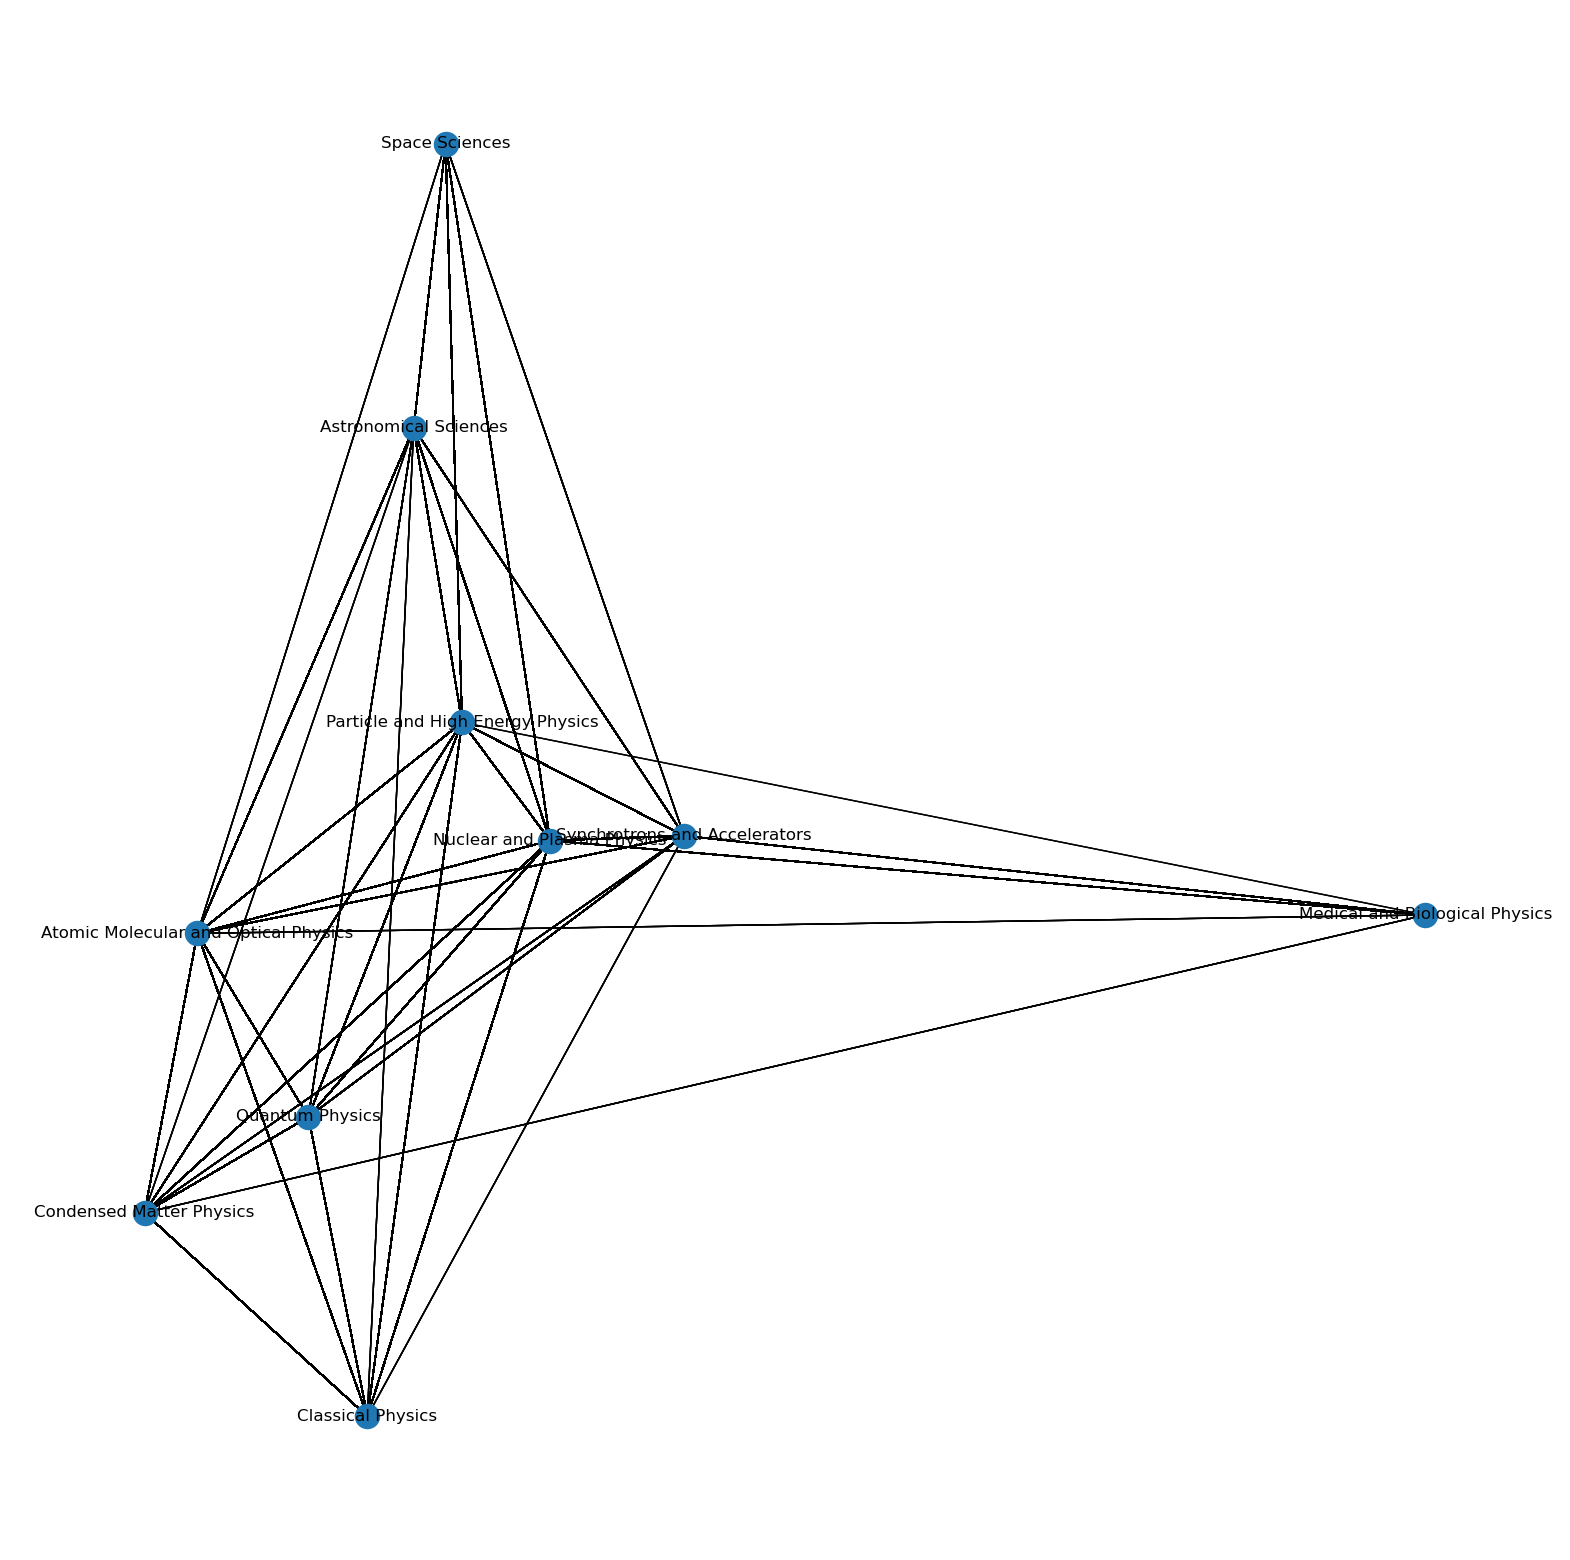

In [98]:
G = nx.from_edgelist((c for n_nodes in df.Labels_str.values.tolist() for c in combinations(n_nodes, r=2)),
                     create_using=nx.MultiGraph)

# visualize graph
fig, ax = plt.subplots(figsize=(20,20))

pos = nx.draw_spring(G, with_labels = True, ax=ax)

The co-occurence graph is not too informative, as  expected *Space Sciences* and *Astronomical Sciences* have very similar co-occurrences.  *Medical and Biological Physics* and *Classical Physics* stand out somewhat as they never occur together, and likewise not with either *Space Sciences* or *Astronomical Sciences*.

Further analysis of the co-occurence of labels:

In [99]:
# pearson correlation for label combinations
single_label_corr = single_label_bool.corr(method = "pearson")

# frequency for label combinations
labels_int = single_label_bool.astype(int)
labels_freq_mat = np.dot(labels_int.T, labels_int)
labels_freq = pd.DataFrame(
    labels_freq_mat,
    columns = all_labels,
    index = all_labels
)

The frequency matrix of label co-occurences:

In [93]:
labels_freq

Nuclear and Plasma Physics  \
Nuclear and Plasma Physics                                 28159   
Synchrotrons and Accelerators                               7605   
Astronomical Sciences                                        603   
Medical and Biological Physics                                73   
Quantum Physics                                              743   
Space Sciences                                               289   
Classical Physics                                            307   
Particle and High Energy Physics                           11872   
Atomic Molecular and Optical Physics                         621   
Condensed Matter Physics                                     298   

                                      Synchrotrons and Accelerators  \
Nuclear and Plasma Physics                                     7605   
Synchrotrons and Accelerators                                  9626   
Astronomical Sciences                                           113   
Medical and Biological Physics                                   77   
Quantum Physics                                                  78   
Space Sciences                                                   10   
Classical Physics                                                 4   
Particle and High Energy Physics                               1388   
Atomic Molecular and Optical Physics                            161   
Condensed Matter Physics                                         29   

                                      Astronomical Sciences  \
Nuclear and Plasma Physics                              603   
Synchrotrons and Accelerators                           113   
Astronomical Sciences                                 15094   
Medical and Biological Physics                            0   
Quantum Physics                                          21   
Space Sciences                                         1981   
Classical Physics                                         4   
Particle and High Energy Physics                       1516   
Atomic Molecular and Optical Physics                    151   
Condensed Matter Physics                                  4   

                                      Medical and Biological Physics  \
Nuclear and Plasma Physics                                        73   
Synchrotrons and Accelerators                                     77   
Astronomical Sciences                                              0   
Medical and Biological Physics                                  2217   
Quantum Physics                                                    0   
Space Sciences                                                     0   
Classical Physics                                                  0   
Particle and High Energy Physics                                   2   
Atomic Molecular and Optical Physics                               4   
Condensed Matter Physics                                           5   

                                      Quantum Physics  Space Sciences  \
Nuclear and Plasma Physics                        743             289   
Synchrotrons and Accelerators                      78              10   
Astronomical Sciences                              21            1981   
Medical and Biological Physics                      0               0   
Quantum Physics                                 30787               0   
Space Sciences                                      0            7170   
Classical Physics                                1317               0   
Particle and High Energy Physics                  863             435   
Atomic Molecular and Optical Physics             7981               5   
Condensed Matter Physics                         3882               0   

                                      Classical Physics  \
Nuclear and Plasma Physics                          307   
Synchrotrons and Accelerators                         4   
Astronomical Sciences                  

Co-occurence of labels; frequency and Pearson matrices as a heatmaps:

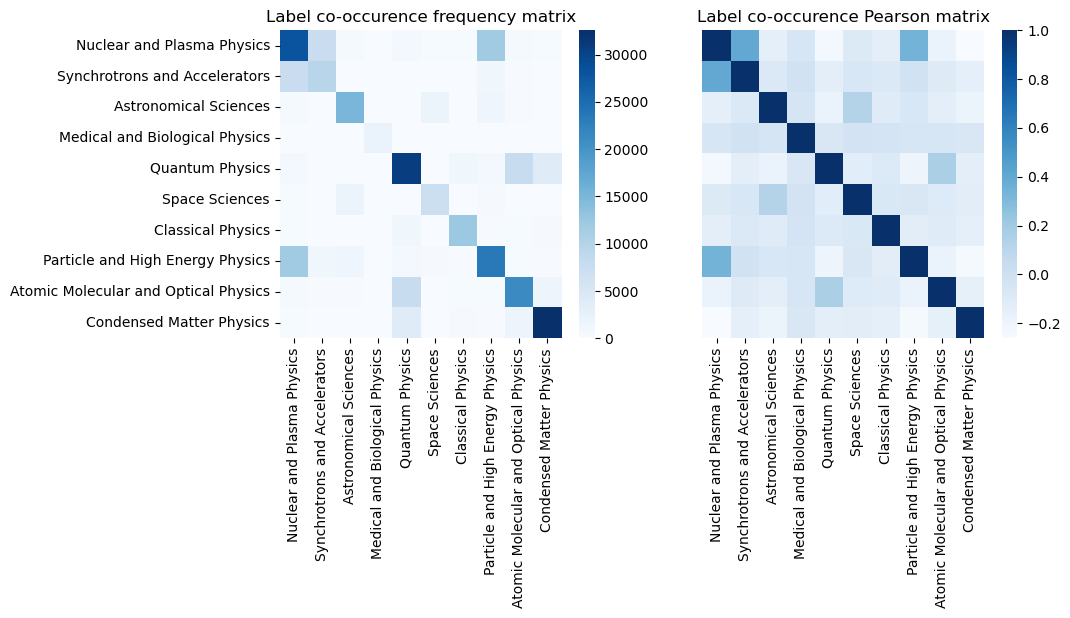

In [94]:
import seaborn as sn
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,4))
ax1.title.set_text('Label co-occurence frequency matrix')
ax2.title.set_text('Label co-occurence Pearson matrix')
sn.heatmap(labels_freq, cmap = "Blues", ax=ax1)
sn.heatmap(single_label_corr, cmap = "Blues", ax=ax2, yticklabels=False)
plt.show()